# <p style="text-align: center;"> CSCI-455 | Computer Vision Systems </p>
<p style="text-align: center;">Circle Edges Detection and Hough Transform - Part I</p>
<p style="text-align: center;">Spring 2020</p>

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from skimage.feature import peak_local_max

<div class="alert alert-block alert-warning">
    1. Things to Recap
</div>

### 1. Reading & Edge Detection

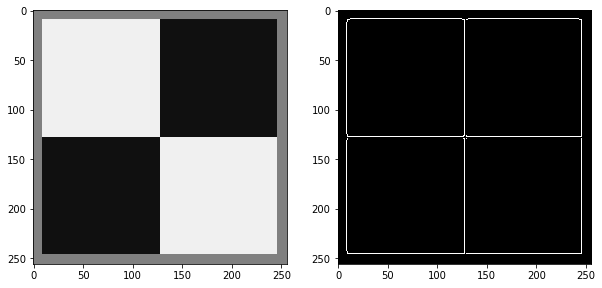

In [2]:
Box = cv2.imread('Boxes.png')

Box_edges = cv2.Canny(Box, 100, 200, 1, 7, True) 

plt.figure(figsize=(10,10))
plt.subplot(1, 2, 1)
plt.imshow(Box, cmap='gray')
plt.subplot(1, 2, 2)
plt.imshow(Box_edges, cmap="gray")
plt.show()

### 2. Hough Transformation

In [3]:
image = Box_edges
def hough_transform(image):
    width = image.shape[1]
    height = image.shape[0]
    
    diag_len = np.ceil(np.sqrt(width * width + height * height)) # max distance for rho = length of diag.
    # 2 * diag length : for positive and negative max distance. 0 being diag_len
    rho_range = int(2*diag_len)
    
    # Initialize empty accumulator (filled with 0)
    hough_accu = np.zeros([rho_range, 180])    # 180 because theta from 0 to 180

    # get i and j indexes for all indexes 
    j_indexes, i_indexes = np.nonzero(image)

    # Browsing into each pixel of edges picture
    for k in range(len(j_indexes)):
        # getting indexes of edge
        i = i_indexes[k]
        j = j_indexes[k]

        # voting : for each value of theta
        for theta in range(0, 180):
            rho = int(np.round(i * np.cos(np.deg2rad(theta)) + j * np.sin(np.deg2rad(theta))) + diag_len)# positive index for rho
            hough_accu[rho, theta] += 1
    
    return hough_accu
hough_accu = hough_transform(image)

### 3. Finding The Peak & Plotting..

In [4]:
# Peak finding
def peak_finding(hough_accu, min_distance = 45, max_peaks = 6, title ='Hough Transform'):

    coordinates = peak_local_max(hough_accu, min_distance=min_distance, exclude_border = False, num_peaks =max_peaks)
    
    loca_maxs_rho = coordinates[:, 0]
    loca_maxs_theta = coordinates[:, 1]
    plt.imshow(hough_accu, cmap='gray',aspect='auto')
    plt.title(title)

    # Annotate local maximum
    for i in range(len(loca_maxs_rho)):
        plt.annotate('X',xy=(loca_maxs_theta[i],loca_maxs_rho[i]), arrowprops=dict(facecolor='yellow', shrink=0.03),)
    plt.show()
    return loca_maxs_rho, loca_maxs_theta

### 4. Draw the Lines & Plotting..

In [5]:
def draw_line(image, loca_maxs_rho, loca_maxs_theta, rgb = (0,255,0)):
    image_copy = image.copy()
    width = image_copy.shape[1]
    height = image_copy.shape[0]
    diag_len = np.ceil(np.sqrt(width * width + height * height)) 
    for j in range(len(loca_maxs_rho)):
        rho = loca_maxs_rho[j] - diag_len
        theta = loca_maxs_theta[j]
        a = np.cos(np.deg2rad(theta))
        b = np.sin(np.deg2rad(theta))
        x1=int(a*rho - diag_len*b) 
        y1=int(b*rho + diag_len*a)
        x2=int(a*rho + diag_len*b)
        y2=int(b*rho - diag_len*a)
        #print(x1,y1,x2,y2)
        cv2.line(image_copy, (x1,y1),(x2,y2), rgb, 3) # green line
        #print('Line {} | rho = {} theta = {}'.format(j,loca_maxs_rho[j], loca_maxs_theta[j]))
        plt.imshow(image_copy)
        plt.title('Detected Line')

    plt.show()
    return image_copy

### 5. Applying the functions

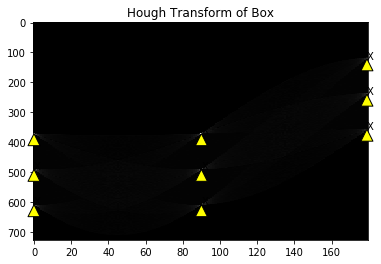

In [7]:
hough_accu = hough_transform(image)
loca_maxs_rho, loca_maxs_theta = peak_finding(hough_accu, max_peaks=50, title='Hough Transform of Box')

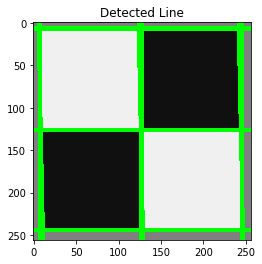

In [8]:
nDraw = draw_line(Box, loca_maxs_rho, loca_maxs_theta)

<div class="alert alert-block alert-warning">
    2. Haugh Transform for Circles
</div>

* Circle: Center as (a, b) and Radius r \begin{equation*} (\mathtt{x}_i-a)^2 + (\mathtt{y}_i-b)^2 = r^2 \end{equation*}
* For a fixed radius r, Unknown Gradient direction:

<img src="Notebook Images/i1.jpg" width="500">

### Applied on Image

<img src="Notebook Images/i2.jpg" width="500">

<img src="Notebook Images/i3.jpg" width="500">

* Note: a diffrent Hough Transform (with a separate accumulators) was used for each circle radius (quarters vs. penny)

<div class="alert alert-block alert-warning">
    3. What if we don't know the Radius?
</div>


<img src="Notebook Images/i4.jpg" width="500">

### So that the algorithm will be..

<img src="Notebook Images/i5.jpg" width="500">



<div class="alert alert-block alert-warning">
    4. Generalized Hough Transform
</div>

1. For every edge point
    - Compute Gradient direction θ
    - Compute Displacemet vector r for refrence point
2. Peak in Hough Space (x, y) is the refrence point with the most voting

<img src="Notebook Images/Gx.jpg" width="1000">

What about Orientation and Scaling ?

<img src="Notebook Images/Ox.jpg" width="500">

<img src="Notebook Images/Sx.jpg" width="500">

* Peak in this Hough Space (now: X, Y, θ′) is the refrence point with most voting

<div class="alert alert-block alert-warning">
    5. Modern Object Detection
</div>

Instead of indexing displacements by Gradient orientation, We index by "Visual Keywords"

<img src="Notebook Images/Tx.jpg" width="500">

<img src="Notebook Images/Fx.jpg" width="1000">

<img src="Notebook Images/Mx.jpg" width="500">